In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. 지도학습

- 훈련데이터 : 정답이 무엇인지 맞춰야 하는 문제에 해당되는 데이터와 정답에 해당되는 레이블로 구성됨

ex) 스팸 메일 분류기
- 데이터 배열이 총 20000개

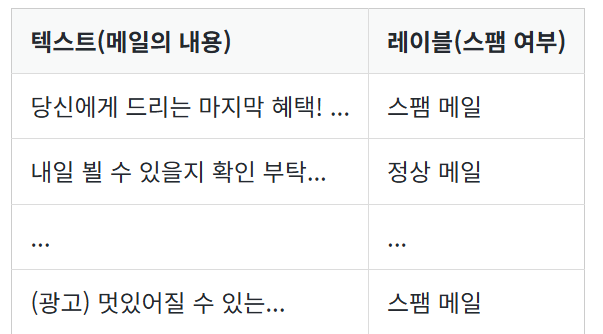


1. 기계를 훈련시키기 위해서는 데이터 분리
- 메일의 내용이 담긴 첫번째 열을 X에 저장
- 스팸 여부를 y에 저장
- 테스트 용으로 일부 데이터 분리 (2000개)
- 여전히 x와 y의 맵핑 관계를 유지해야함


<훈련 데이터>

X_train : 문제지 데이터

y_train : 문제지에 대한 정답 데이터.

<테스트 데이터>

X_test : 시험지 데이터.

y_test : 시험지에 대한 정답 데이터.

1. 기계는 이제 X_train과 y_train 학습
- 학습 상태에서는 정답지인 y_train을 볼 수 있기 때문에 18000개의 문제지 X_train과 y_tain을 함께 보면서 규칙을 도출함

2. 학습을 다 한 기계에게 y_test는 보여주지않고 X_test에 대해 정답을 예측하게함

3. 기계가 예측한 답과 y_test를 비교하면서 정답을 얼마나 맞췄는지 평가 = Accuracy

# 2. X와 y분리하기

## 1) zip 함수를 이용해 분리하기
- 동일한 개수를 가지는 시퀀스 자료형에서 각 순서에 드앙하는 원소들끼리 묶어주는 역할

In [3]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


각 데이터에서 첫 번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶임 -> X DATA, Y DATA로 사용가능

## 2) 데이터프레임을 이용해 분리하기

In [4]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df


,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [5]:
X=df['메일 본문']
y=df['스팸 메일 유무']

In [7]:
print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


## 3) Numpy를 이용해 분리하기

In [9]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [10]:
#마지막 열을 제외하고 x에 저장
#마지막 열만 y에 저장
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


# 3. 테스트 데이터 분리

## 1. 사이킷 런을 이용해 분리

X : 독립 변수 데이터. (배열이나 데이터프레임)

y : 종속 변수 데이터. 레이블 데이터.

test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.

train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.

random_state : 난수 시드

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [12]:
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


- 7:3으로 데이터 분리
- train_test_split()은 기본적으로 데이터의 순서를 섞고나서 훈련 데이터와 테스트 데이터를 분리한다.

In [13]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [14]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [15]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)


y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


## 2) 수동으로 분리하기

In [16]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))


X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [18]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


- 훈련/테스트 데이터 셋을 멸 개로 할지 정하기만 한 상태
- num_of_test를 len(X) * 0.2로 계산해서는 안됨 -> 어느 한 쪽을 먼저 계산하고 그 값만큼 제외하는 방식으로 계산해야함

In [19]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [20]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))


X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]
